In [2]:
# imports
import pandas as pd
import json

## Labels

In [7]:
# loading the file
labels = json.load(open("Data/fgvc4_iMat.label_map.json"))
labels.keys()

dict_keys(['labelInfo'])

It is a dictionary with only one key (`labelInfo`) containing another dictionary. The inner dictionary contains all labels names and their corresponding ID. We transform the inner dict into a dataframe.

In [4]:
# turning the dict into a df
labels_df = pd.DataFrame.from_dict(labels['labelInfo'])

# casting str into int
labels_df = labels_df.astype({'labelId': int})
labels_df.head()

,labelName,labelId
0,men,1
1,adult,2
2,black,3
3,women,4
4,flat,5


In [5]:
len(labels_df)

381

There are 381 different labels, each of them has a corresponding label ID.

## Tasks

In [ ]:
# loading the file
tasks = json.load(open("Data\imaterialist-challenge-FGVC2017/fgvc4_iMat.task_map.json"))
tasks.keys()

It is a dictionary with only one key (`taskInfo`) containing another dictionary. The inner dictionary contains all task names and their corresponding ID. We transform the inner dict into a dataframe.

In [7]:
def f(x):
    return x.split(":")[0][0], x.split(":")[0][1]

In [8]:
# turning the dict into a df
tasks_df = pd.DataFrame.from_dict(tasks['taskInfo'])

# casting str to int
tasks_df = tasks_df.astype({'taskId': int})

# splitting the task name into two columns
tasks_df[['category', 'label_to_predict']] = pd.DataFrame((tasks_df.apply(lambda x: f(x.str), axis=1)).tolist(), 
                                                          index=tasks_df.index)
tasks_df.head()

,taskName,taskId,category,label_to_predict
0,shoe:gender,1,shoe,gender
1,shoe:age,2,shoe,age
2,shoe:color,3,shoe,color
3,shoe:up height,4,shoe,up height
4,dress:decoration,5,dress,decoration


In [9]:
len(tasks_df)

45

There are 45 different tasks, each of them has a corresponding task ID. The name of each task indicates the category of clothing it concerns (between shoe, dress, outerwear and pants) and the type of label that should be predicted.

In [10]:
# printing the number of tasks for each clothing category
tasks_df.groupby('category').count().rename(columns = {'taskName': 'Number of tasks'})[['Number of tasks']]

,Number of tasks
category,
dress,11
outerwear,10
pants,10
shoe,14


## Training set

In [15]:
# loading the file
train = json.load(open("imaterialist-challenge-FGVC2017/fgvc4_iMat.train.data.json"))
train.keys()

dict_keys(['images', 'info', 'annotations', 'license'])

We are only interested in `images` and `annotations`.

`train['images']` is a list of dictionaries, strucutred as follows: `{'url':[list of urls], 'imageId': n}`

In [16]:
# example of dict. Each dict corresponds to one image and for each image there's only one dict
train['images'][0]

{'url': ['http://im28.gulfup.com/2012-04-14/1334424802942.jpg',
  'http://productshots0.modcloth.com/productshots/0062/9433/9c957ccc31e39e90c774dfd8351df5e7.jpg?1298662748',
  'http://productshots2.modcloth.com/productshots/0062/9433/9c957ccc31e39e90c774dfd8351df5e7.jpg?1298662748',
  'http://productshots3.modcloth.com/productshots/0062/9433/9c957ccc31e39e90c774dfd8351df5e7.jpg',
  'http://productshots3.modcloth.net/productshots/0062/9433/9c957ccc31e39e90c774dfd8351df5e7.jpg',
  'http://productshots3.modcloth.net/productshots/0062/9433/9c957ccc31e39e90c774dfd8351df5e7.jpg?1298662748',
  'http://www.canaryrook.com/uploads/products/poema-moments-to-remember-dress_mc509151449.jpg%3F1298662748',
  'https://s-media-cache-ak0.pinimg.com/originals/69/ac/48/69ac48e09b6b42ceceec674504306f63.jpg'],
 'imageId': '1'}

In [17]:
len(train['images'])

42029

`train['annotations']` is a list of dictionaries, structured as follows: `{'labelId': n, 'imageId': 'n', 'taskId': n}`

In [18]:
# two examples of annotations dict
train['annotations'][0], train['annotations'][1]

({'labelId': '6', 'imageId': '1', 'taskId': '5'},
 {'labelId': '7', 'imageId': '2', 'taskId': '6'})

In [19]:
len(train['annotations'])

62088

The list of annotation dictionaries is longer than the one of images, implying that some image can have multiple annotations (which should refer to different tasks).

In [20]:
# example of image with two annotations
for el in train['annotations']:
    if el['imageId'] == '52':
        print(el)

{'labelId': '1', 'imageId': '52', 'taskId': '1'}
{'labelId': '37', 'imageId': '52', 'taskId': '3'}


In [21]:
# labels id of annotation 1 and 2 and to what they correspond
labels_df[labels_df.labelId.isin([1,37])]

,labelName,labelId
0,men,1
36,white,37


In [22]:
# tasks id of annotation 1 and 2 and to what they correspond
tasks_df[tasks_df.taskId.isin([1,3])]

,taskName,taskId,category,label_to_predict
0,shoe:gender,1,shoe,gender
2,shoe:color,3,shoe,color


In [25]:
annotations_df = pd.DataFrame.from_records(train['annotations']).astype(int)
annotations_df.head()

,labelId,imageId,taskId
0,6,1,5
1,7,2,6
2,8,3,7
3,10,4,9
4,14,5,12


In [37]:
# with this we can see for each task how many images there are
a = annotations_df.groupby('taskId').count().sort_values('labelId')
a.head()

,labelId,imageId
taskId,,
43,65,65
45,71,71
42,92,92
29,239,239
27,252,252


In [26]:
# pd.merge(a, tasks_df, right_on = 'taskId', left_on = 'taskId').sort_values('labelId', ascending = False)

In [24]:
# with this we can see what labels correspond to task t
t = 26
annotations_df[annotations_df.taskId == t].labelId.unique()

array([ 94, 113, 183,  24, 214,   8,  92, 101, 252,  85,  83, 260,  88,
        16,  49, 312, 209, 176, 204, 112, 210, 369, 187, 334,  95, 306,
       289, 154, 321])

In [69]:
# description of the task
tasks_df[tasks_df.taskId == t]

,taskName,taskId,category,label_to_predict
23,pants:decoration,24,pants,decoration


In [66]:
# all labels for the task 
t = 24
label_task_t = annotations_df[annotations_df.taskId == t].labelId.unique()
labels_df[labels_df.labelId.isin(label_task_t)].sort_values('labelName').head() # (remove head to see all)

,labelName,labelId
187,bleached,188
128,camouflage,129
215,drawstring,216
374,elastic waist,375
58,embroidery,59


## Retrieving garment category for each image

In [45]:
category_df = pd.merge(annotations_df, tasks_df, right_on = 'taskId', left_on = 'taskId').sort_values('labelId',
                                                                                         ascending = False)
category_df = category_df[['taskId', 'imageId', 'category']]
category_df.head()

,taskId,imageId,category
1247,5,21116,dress
1705,5,28561,dress
1707,5,28589,dress
225,5,5292,dress
1301,5,21927,dress


In [48]:
shoe_imgs = set(category_df[category_df.category == 'shoe'].imageId.unique())
dress_imgs = set(category_df[category_df.category == 'dress'].imageId.unique())
pants_imgs = set(category_df[category_df.category == 'pants'].imageId.unique())
out_imgs = set(category_df[category_df.category == 'outerwear'].imageId.unique())

In [47]:
len(shoe_imgs)+len(dress_imgs)+len(pants_imgs)+len(out_imgs)

42058

Le immagini sono 42029, quindi alcuni label id devono essere in più di un set.

In [49]:
shoe_imgs.intersection(dress_imgs)

{292, 11378, 13466, 15914}

In [50]:
shoe_imgs.intersection(pants_imgs)

{37654}

In [51]:
shoe_imgs.intersection(out_imgs)

{4090, 6631, 32978}

In [52]:
dress_imgs.intersection(pants_imgs)

set()

In [53]:
dress_imgs.intersection(out_imgs)

{8692, 12001, 15601}

In [54]:
pants_imgs.intersection(out_imgs)

{2097,
 3804,
 4884,
 5822,
 11124,
 12443,
 12728,
 13479,
 13515,
 22732,
 24854,
 26795,
 27113,
 28016,
 28282,
 30426,
 31917,
 39406}

Alcune immagini appartengono a più categorie.

In [70]:
import matplotlib.pyplot as plt

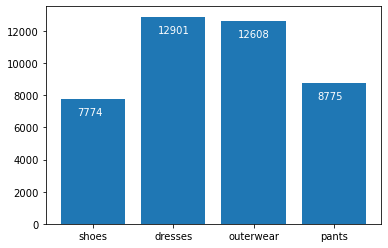

In [94]:
values = [len(x) for x in (shoe_imgs, dress_imgs, out_imgs, pants_imgs)]
plt.bar(x = [0,1,2,3], height = values)
labels = ['shoes','dresses','outerwear','pants']
for i, v in enumerate(values):
    plt.text(i-0.2, v-1000, str(v), color = 'white')
plt.xticks(ticks = [0,1,2,3], labels = ['shoes','dresses','outerwear','pants'])
plt.show()